# Multi-Layer Perceptron (MLP) Classifier

In this notebook, we build a MLP classifier using the **TensorFlow (2.0) Keras API**. The MLP is a Dense or Fully-Connected (FC) neural network. 

We use the MLP classifier to perform multi-class classifcation on the **MNIST handwritten digits** dataset.


## Regularization Techniques

We employ the following regularization techniques.
- Dropout regularization
- Early Stopping regularization


Another regularization technique is the **L1 or L2 norm** based regularization. We did not use this technique. We provided commented out codes for this regularization.


## Learning Curves
To help understand a model's performance (underfitting/overfitting, etc.), we plot a model's training & validation accuracy/loss with repect to the epochs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

2022-11-15 11:00:05.176067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load & Scale the Dataset

- Load the MNIST data using the Kears API
- Create a separate validation set
- Scale the data

### Saling Technique

We use the Min-Max scaling technique.

$X = \frac{X - X_{min}}{X_{max} - X_{min}}$

=> $X = \frac{X - 0}{255 - 0} = \frac{X}{255}$

In [2]:
mnist = tf.keras.datasets.mnist

# Load the full training & test data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()


# Create validation dataset as well as scale (max-min scaling) the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)

No. of Training Samples:  (55000, 28, 28)
No. of Training Labels:  (55000,)

No. of Validation Samples:  (5000, 28, 28)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 28, 28)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


## Build the MLP Model


We want to build the following two hidden layer based architecture for the MLP model:
- Two hidden layers each with 300 and 100 neurons, respectively
- One classification layer (final layer) with 10 neurons


We use the following steps to build the above architecture.
- Create a Sequential model.

- Add following 4 layers in the model: input preprocessing layer, 2 hidden layers and one output layer.

- Layer 1 (Input Preprocessing): At first, we need to flatten the input images to create 1D array for each image. It is done by the **Flatten layer** that reshapes the input data X as follows: X.reshape(-1, 1). It is a type of Reshaping layer: https://keras.io/api/layers/reshaping_layers/ 

        -- This layer does some simple preprocessing & does not have any parameters. Since it is the first layer in the model, we should specify the input_shape, i.e., the shape of the instances, i.e., 28 x 28. We don't need to include the batch size. 
        
        -- An alternative to this is to flatten the input fetures prior creating the model. Then, in the model, instead of having the Flatten layer, we could simply add an Input layer that instantiates an input tensor for buildng the model as follows: keras.Input(shape=(784,)). Note that the shape value is 784 (don't include the batch size), not 28 x 28. Because we have had flattened the input already. 

- Layer 2 and 3 (Hidden Layers): Next we add two **Dense** hidden layers with 300 neurons and 100 neurons, respectively. 

A Dense layer is a regular densely-connected neural network layer. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). 
        
For each Dense layer, specify the following:

         -- Number of neurons (units): for the final layer number of neurons should be one (for binary classification) and equal to the number of classes (for multi-class classification)
         
         -- Weight initializer (kernel_initializer)
         
         -- Activation function (activation): for the final layer activation function should be "sigmoid" (for binary classification) and "softmax" (for multi-class classification)
         

- To apply regularization, add a Dropout layer after the Dense layer (except the final layer). Only set the "rate" parameter. Note that the dropout layer is added only after the hidden layers.
https://keras.io/api/layers/regularization_layers/dropout/
        

- Layer 4 (Output Layer): Finally, we add a **Dense** output layer with 10 neurons (one per class). We use the softmax activation function (because the classes are exclusive).


Find a suitable weight initializer (using the kernel_initializer argument) from the following link:
https://keras.io/api/layers/initializers/#available-initializers


Find a suitable activation function (using the activation argument) from the following link:
https://keras.io/api/layers/activations/#available-activations


In [3]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))



'''
An alternative technique to create MLP using the Sequential model 
- Pass a list of layers when creating the Sequential model
'''
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation),
#     tf.keras.layers.Dropout(rate=0.5), # add if needed
#     tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation),
#     tf.keras.layers.Dropout(rate=0.1), # add if needed
#     tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
#                              activation="softmax")
# ])



'''
Create the MLP with L2 regularization
'''
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
#                        kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
#     tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
#                        kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
#     tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
#                             activation="softmax")
# ])


model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         


2022-11-15 11:02:23.620238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: user 173 ms, sys: 40.4 ms, total: 213 ms
Wall time: 363 ms


## Model Summary

From the model summary (above) observe the number of layers, shape of the output and the number of weights (parameters).

- Number of parameters Input --> Hidden Layer 1: 784 + 1 bias neuron * 300 hidden neurons = 235,500

- Number of parameters Hidden Layer 1 --> Hidden Layer 2: 300 + 1 bias neuron * 100 hidden neurons = 30,100

- Number of parameters Hidden Layer 2 --> Output Layer: 100 + 1 bias neuron * 10 neurons = 1,010

Total number of trainable weights = 235,500 + 30,100 + 1,010 = 266,610



## Train the MLP Model

There are two steps for training a model.
- Compile 
- Train


#### Compile the Model
For compiling the model, we use the model's "compile" method. This method requires to select a suitable:
- Loss function: https://keras.io/api/losses/
- Optimizer: https://keras.io/api/optimizers/
- Performance metric: https://keras.io/api/metrics/


#### Train the Model
To train the model, use its "fit" method. Set the following parameters.
- Training data & label
- Batch size
- Number of epochs
- Verbose
- Validation data & label
- Callback



### Early Stopping Regularization
We implement early stopping by using the **EarlyStopping callback** function. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. https://keras.io/api/callbacks/early_stopping/

Following are the parameters of this callback:
- monitor: Quantity to be monitored. Set the "monitor" parameter with either "val_loss" or "val_accuracy".
- min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e., an absolute change of less than min_delta, will count as no improvement.
- patience: Number of epochs with no improvement after which training will be stopped.
- verbose: verbosity mode.
- mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
- restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.


        We include the early stopping callback in the fit() method.

There are other callbacks that could be useful: https://keras.io/api/callbacks/





### History Object
The fit() method returns a History object that contains:

- The training parameters (history.params)
- The list of epochs it went through (history.epoch)
- A dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any)

The history object is used to create the learning curves.

In [4]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 6s 6ms/step - loss: 0.8164 - accuracy: 0.7265 - val_loss: 0.3213 - val_accuracy: 0.9084
Epoch 2/50
860/860 [==============================] - 6s 7ms/step - loss: 0.3228 - accuracy: 0.9034 - val_loss: 0.2378 - val_accuracy: 0.9310
Epoch 3/50
860/860 [==============================] - 6s 7ms/step - loss: 0.2515 - accuracy: 0.9243 - val_loss: 0.1831 - val_accuracy: 0.9442
Epoch 4/50
860/860 [==============================] - 14s 16ms/step - loss: 0.2090 - accuracy: 0.9367 - val_loss: 0.1571 - val_accuracy: 0.9544
Epoch 5/50
860/860 [==============================] - 9s 11ms/step - loss: 0.1791 - accuracy: 0.9459 - val_loss: 0.1401 - val_accuracy: 0.9594
Epoch 6/50
860/860 [==============================] - 7s 8ms/step - loss: 0.1591 - accuracy: 0.9514 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 7/50
860/860 [==============================] - 6s 7ms/step - loss: 0.1396 - accuracy: 0.9570 - val_loss: 0.1116 - val_accuracy: 0.9670
Epo

## History Object

Using the history object we view the following information:

- The training parameters (history.params)
- The list of epochs it went through (history.epoch)
- A dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any)

In [5]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Evaluate the Model 

There are at least three ways to evaluate the model.
- Use the evaluate() method to get validation loss and accuracy
- Use the predict() method to get test output, then compute accuracy, confusion matrix, etc.
- Use the predict_classes() method to get test output, then compute accuracy, confusion matrix, etc.


### The evaluate() Method

We can evaluate the model on the test set to estimate the generalization error (loss & accuracy) by using the evaluate() method. See the hyperparameters used by this method: https://keras.io/api/models/model_training_apis/#evaluate-method

    This technique is not useful if we want to create the confusion matrix.


### The predict() Method
We can also use the model’s predict() method to make predictions on new instances. It estimates one probability per class, from class 0 to class 9. Thus, it returns 10 probabilities for each instance. For the full dataset with N instances, it returns a matrix of dimension $N \times 10$. Then, we may use np.argmax() function with axis=1 to get the class label with the highest probability.


    
### The predict_classes() Method
Alternatively, we can use the model's predict_classes() method that returns the index (class label) with largest probability. For the full dataset with N instances it returns 1D array of size N.

  
### The predict() vs the predict_classes() Methods
The predict() method is preferable is situations where we are interested to **learn about the uncertainties** of our model. Consider a scenario in which our model predicted the following for a single data: [0, 0, 0, 0.49, 0, 0, 0.51, 0, 0, 0]. Here the largest probability is 0.51 which indicates that the predicted label should be "7". However, for the class "4", the probability is also very high, i.e., 0.49. For this type of scenarios, although the predict_classs() method would return the label of the class with the largest probability, the predict() method would allow us to learn the uncertainty associated with the prediction.
    
    Below we use the evaluate() and the predict() method.

In [6]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  47

Test Data: Loss & Accuracy:  [0.06017930805683136, 0.9829000234603882]
1719/1719 [==============================] - 8s 5ms/step

Train Accuracy:  0.9990909090909091

Test Accuracy:  0.9829

Test Confusion Matrix:
[[ 970    1    1    1    1    2    1    1    1    1]
 [   0 1127    0    1    0    1    3    0    3    0]
 [   0    2 1018    3    1    0    0    5    3    0]
 [   0    0    3  998    0    3    0    2    2    2]
 [   0    0    3    1  962    0    3    3    1    9]
 [   2    0    0   11    1  872    2    0    2    2]
 [   4    3    1    1    3    4  938    0    4    0]
 [   2    3    5    2    1    0    0 1006    3    6]
 [   0    0    2    5    2    2    1    3  957    2]
 [   2    2    0    8    4    4    1    4    3  981]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
  

## Plot Learning Curves

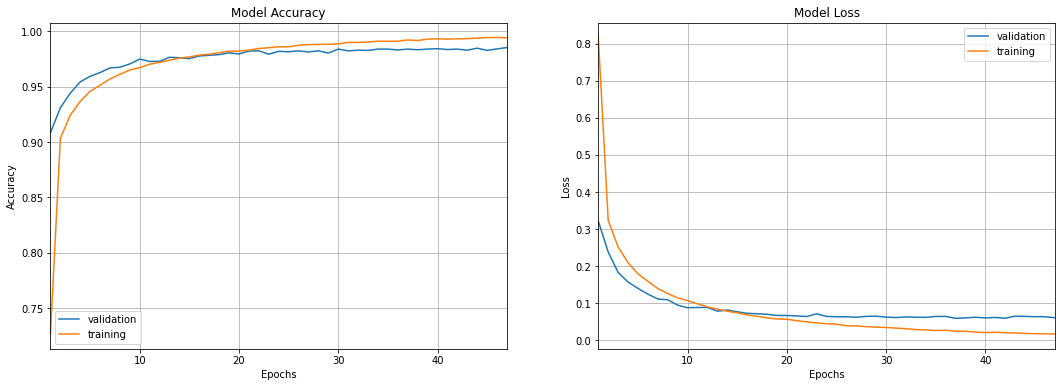

In [7]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 